In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Descargar datos históricos.
ydata = yf.download('EURUSD=X', start='2025-04-25', end='2025-05-01', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [60]:
# Cálculo de las medias móviles.
ydata['ema12'] = ydata['Close'].ewm(span=6, adjust=False).mean()
ydata['ema26'] = ydata['Close'].ewm(span=18, adjust=False).mean()

# Cálculo del MACD.
ydata['macd'] = ydata['ema12'] - ydata['ema26']

# Cálculo de la señal (EMA de X periodos del MACD)
ydata['signal_ln'] = ydata['macd'].ewm(span=5, adjust=False).mean()

In [61]:
# Definir reglas de entrada y salida.
ydata['Signal'] = 0

# Señal de Compra.
ydata.loc[(ydata['macd'].shift(1) <= ydata['signal_ln'].shift(1)) & (ydata['macd'] > ydata['signal_ln']), 'Signal'] = -1

# Señal de Venta.
ydata.loc[(ydata['macd'].shift(1) >= ydata['signal_ln'].shift(1)) & (ydata['macd'] < ydata['signal_ln']), 'Signal'] = 1

In [62]:
# Simular la ejecución de las órdenes
ydata['Posicion'] = ydata['Signal'].shift()

# Calcular los retornos de la estrategia
# Primero calculamos el cambio porcentual
retornos = ydata['Close'].pct_change()
# Asegurarnos de que retornos sea una Serie
if isinstance(retornos, pd.DataFrame):
    retornos = retornos.squeeze()
# Luego multiplicamos por la posición
ydata['Strategy_returns'] = ydata['Posicion'] * retornos

# Eliminar NaNs
ydata.dropna(inplace=True)

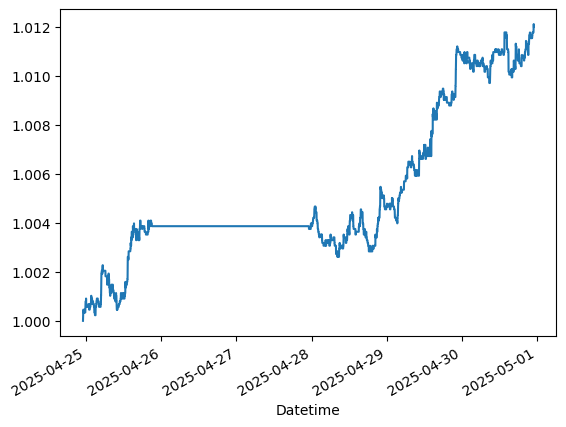

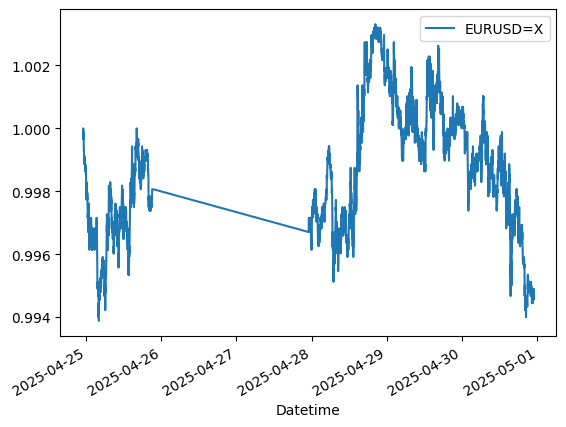

In [64]:
# Graficar el rendimiento de la estrategia.
(ydata['Strategy_returns'] + 1).cumprod().plot(label='Strategy')
(ydata['Close'].pct_change() + 1).cumprod().plot(label='EURUSD')
plt.legend()
plt.show()